# Лабораторная работа 1 (Вариант 48)

In [25]:
import numpy as np
import pandas as pd

# инициализация библиотек для обучения модели
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

In [26]:
# импорт датасета
data = pd.read_csv('C:/Users/Артём/Desktop/jupyter/Lab1_numerical_methods_of_analysis_2025/housing.csv', sep=",")

In [27]:
#функция аналитического обучения модели
def analytical_computation_model(data, degrees=1, scale=False):
    
    #разбиение данных на признаки и целевую переменную
    X, y = data.drop([data.columns[13]],axis = 1), data[data.columns[13]]

    # создаем объект класса и применяем настройки
    poly = PolynomialFeatures(degrees, include_bias = False, interaction_only = True)
    X_poly = poly.fit_transform(X)
    
    # разбиение данных на тренировочные и тестовые
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.21, random_state = 48)

    # возможность масштабирования данных
    if scale:
        scale = StandardScaler()
        scale.fit(X_train)
        X_train, X_test = scale.transform(X_train), scale.transform(X_test)

    # добавление столбца с единицами в набор данных с признаками для вычисления свободного коэффициента (intersept = True)
    X_train_w_int = np.c_[np.ones(len(X_train)), X_train]
    X_test_w_int = np.c_[np.ones(len(X_test)), X_test]

    # Аналитическое вычисление коэффициентов
    #
    #                                   ( XT * X ) ** -1     *         XT        *    y
    alpha = np.linalg.inv((X_train_w_int.T) @ X_train_w_int) @ (X_train_w_int.T) @ y_train

    # делаем предикт значений - применение коэффициентов к признакам
    X_train_pred = X_train_w_int @ alpha
    X_test_pred = X_test_w_int @ alpha

    # число обусловленности матрицы
    cond = np.linalg.cond(X_train_w_int.T@X_train_w_int)
    
    # возвращаем предикты и целевые значения
    return [X_train_pred, X_test_pred, y_train, y_test, cond]

In [28]:
def programm_computation_model(data, degrees=1, scale=False):
    
    #разбиение данных на признаки и целевую переменную
    X, y = data.drop([data.columns[13]],axis = 1), data[data.columns[13]]

    # создаем объект класса
    poly = PolynomialFeatures(degrees, include_bias = False, interaction_only = True)
    
    # разбиение данных на тренировочные и тестовые
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.21, random_state = 48)

    # возможность масштабирования данных
    if scale:
        scale = StandardScaler()
        scale.fit(X_train)
        X_train, X_test = scale.transform(X_train), scale.transform(X_test)

    # вычисление коэффициентов и применение настроек на данных
    X_train = poly.fit_transform(X_train)
    X_test = poly.transform(X_test)
    model = LinearRegression(fit_intercept = True)
    model = model.fit(X_train, y_train)

    # вычисление предиктов
    X_train_pred = model.predict(X_train)
    X_test_pred = model.predict(X_test)

    # возвращаем предикты и целевые значения
    return [X_train_pred, X_test_pred, y_train, y_test]

In [29]:
# инициализация аналитического вычисления модели

an_model_data = analytical_computation_model(data, degrees=1, scale=False)
x_train_pred, x_test_pred, y_train, y_test, cond = an_model_data[0], an_model_data[1], an_model_data[2], an_model_data[3], an_model_data[4]

In [30]:
# инициализация программного вычисления модели

# pr_model_data = programm_computation_model(data, degrees=1, scale=True)
# x_train_pred, x_test_pred, y_train, y_test = pr_model_data[0], pr_model_data[1], pr_model_data[2], pr_model_data[3]

In [31]:
# средняя квадратичная ошибка на трейне
print(mean_absolute_error(x_train_pred, y_train))

# средняя квадратичная ошибка на тесте
print(mean_absolute_error(x_test_pred, y_test))

# число обусловленности матрицы
print(cond)

3.1036602919247525
3.6635392608680175
227995867.67990732


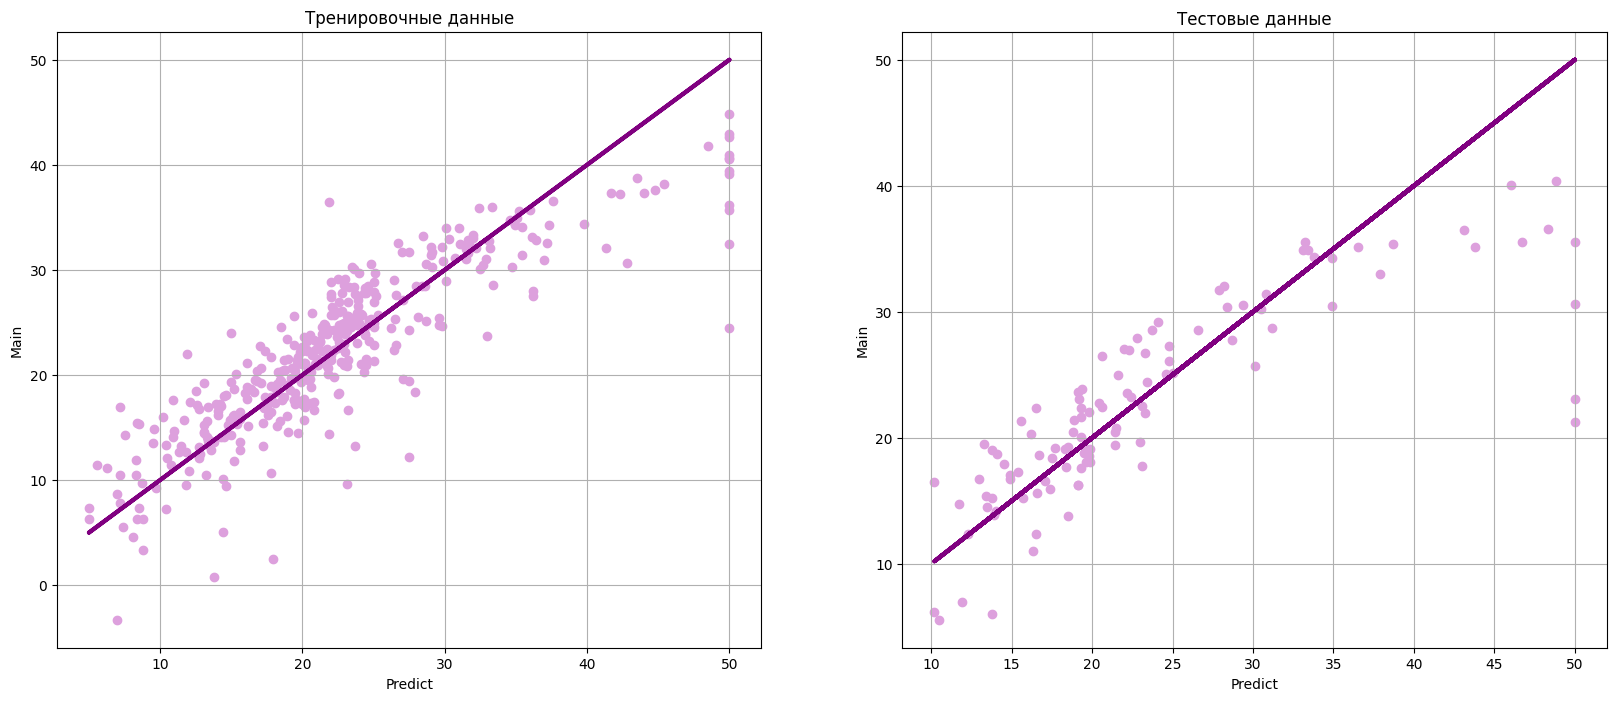

In [32]:
# Общий размер фигуры
plt.figure(figsize=(20, 8))

plt.subplot(121)
# визуализируем обученную на трейн-данных модель
plt.scatter(y_train, x_train_pred, color='#DDA0DD')
plt.plot(y_train, y_train, color='#800080', linewidth="3")

plt.title("Тренировочные данные")
plt.xlabel("Predict")
plt.ylabel("Main")
plt.grid()

plt.subplot(122)
# визуализируем тестирование на тест-данных
plt.scatter(y_test, x_test_pred, color='#DDA0DD')
plt.plot(y_test, y_test, color='#800080', linewidth="3")

plt.title("Тестовые данные")
plt.xlabel("Predict")
plt.ylabel("Main")
plt.grid()

plt.show()

In [33]:
columns = ["№ Эксперимента", "StandardScaler", "PolynomialFeatures", 
           "mean_absolute_error (train)", "mean_absolute_error (test)", 
           "np.linalg.cond(X_train.T@X_train)"]

# инициализация массива для датасета
all_data = []

# формируем датасет для отчета
for index in range(1, 7):

    # массив степеней полиномов для подстановки
    degrees = [0, 1, 1, 2, 2, 3, 3]

    # условие четности для теста одного полинома с масштабированием и без
    if index % 2 == 0:

        # сбор аналитических данных
        predict_data = analytical_computation_model(data, degrees[index], scale=True)
        mae_train = mean_absolute_error(predict_data[0], predict_data[2])
        mae_test = mean_absolute_error(predict_data[1], predict_data[3])
        cond = round(predict_data[4], 3)

        # запись данных в датасет
        curr_data = [index, True, degrees[index], mae_train, mae_test, cond]
        all_data.append(curr_data)
        
    else:
        
        # сбор аналитических данных
        predict_data = analytical_computation_model(data, degrees[index], scale=False)
        mae_train = mean_absolute_error(predict_data[0], predict_data[2])
        mae_test = mean_absolute_error(predict_data[1], predict_data[3])
        cond = round(predict_data[4], 3)
        
        # запись данных в датасет
        curr_data = [index, False, degrees[index], mae_train, mae_test, cond]
        all_data.append(curr_data)

analitic_data = pd.DataFrame(all_data, columns=columns)

In [34]:
analitic_data

,№ Эксперимента,StandardScaler,PolynomialFeatures,mean_absolute_error (train),mean_absolute_error (test),np.linalg.cond(X_train.T@X_train)
0,1,False,1,3.103660,3.663539,2.279959e+08
1,2,True,1,3.103660,3.663539,9.854000e+01
2,3,False,2,1.752206,2.601756,1.497356e+16
3,4,True,2,1.752206,2.601756,3.982913e+08
4,5,False,3,38.564485,471084.720465,6.316185e+30
5,6,True,3,155.556929,5467.384301,7.234138e+17


Заметим, что при использовании масштабирования число обусловленности матрицы становится в разы меньше.